# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
df = pd.read_excel("../dataset/data_pip_cleaned.xlsx")
df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Jalan kaki,Wirausaha,4213001,1,Tidak,Tidak,Tidak Layak
1,Sepeda motor,Lainnya,3249958,Lebih dari 3,Tidak,Tidak,Layak
2,Jalan kaki,Peternak,4166323,2,Tidak,Tidak,Tidak Layak
3,Jalan kaki,Lainnya,3261966,2,Tidak,Tidak,Tidak Layak
4,Sepeda motor,Wirausaha,3254943,Lebih dari 3,Tidak,Tidak,Layak


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Alat Transportasi      1000 non-null   object
 1   Pekerjaan Orang Tua    1000 non-null   object
 2   Penghasilan Orang Tua  1000 non-null   int64 
 3   Jumlah Tanggungan      1000 non-null   object
 4   Pemilik KIP            1000 non-null   object
 5   Pemilik KPS            1000 non-null   object
 6   Status                 1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


# Preprocessing Data

Kelompokan data penghasilan orang tua : rendah, sedang, tinggi

In [4]:
df_binning = df.copy()

In [5]:
import pandas as pd

# Misal df sudah ada dan kolom penghasilan bernama 'Penghasilan Orang Tua'
def kategori_penghasilan(nilai):
    if nilai <= 1500000:
        return 'rendah'
    elif nilai <= 3000000:
        return 'sedang'
    else:
        return 'tinggi'

# Terapkan fungsi ke kolom
df_binning['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].apply(kategori_penghasilan)

# Cek hasil
cek = pd.DataFrame({
    'Penghasilan Orang Tua': df['Penghasilan Orang Tua'],
    'Kategori': df_binning['Penghasilan Orang Tua']
})
print(cek.head(10))

   Penghasilan Orang Tua Kategori
0                4213001   tinggi
1                3249958   tinggi
2                4166323   tinggi
3                3261966   tinggi
4                3254943   tinggi
5                4691725   tinggi
6                2528375   sedang
7                1016130   rendah
8                3911749   tinggi
9                4647122   tinggi


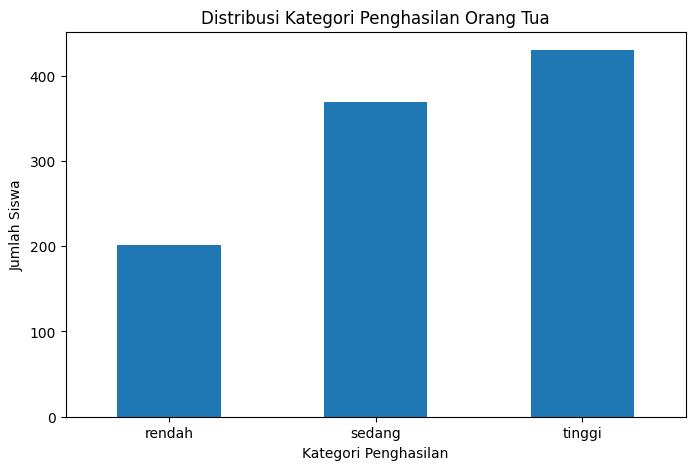

In [6]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori
counts = df_binning['Penghasilan Orang Tua'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
counts.plot(kind='bar')
plt.title('Distribusi Kategori Penghasilan Orang Tua')
plt.xlabel('Kategori Penghasilan')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=0)
plt.show()


In [7]:
df = df_binning.copy()

In [8]:
df

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Jalan kaki,Wirausaha,tinggi,1,Tidak,Tidak,Tidak Layak
1,Sepeda motor,Lainnya,tinggi,Lebih dari 3,Tidak,Tidak,Layak
2,Jalan kaki,Peternak,tinggi,2,Tidak,Tidak,Tidak Layak
3,Jalan kaki,Lainnya,tinggi,2,Tidak,Tidak,Tidak Layak
4,Sepeda motor,Wirausaha,tinggi,Lebih dari 3,Tidak,Tidak,Layak
...,...,...,...,...,...,...,...
995,Sepeda motor,Wirausaha,sedang,2,Tidak,Tidak,Tidak Layak
996,Jalan kaki,Buruh,sedang,1,Tidak,Tidak,Tidak Layak
997,Jalan kaki,Petani,tinggi,Lebih dari 3,Ya,Tidak,Tidak Layak
998,Sepeda motor,Petani,sedang,2,Tidak,Tidak,Tidak Layak


Encode Kolom Kategori

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# pilih tipe kategorical
cat_columns = df.select_dtypes(include=['object']).columns

# encode categorical variables
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,0,4,2,0,0,0,1
1,1,1,2,3,0,0,0
2,0,3,2,1,0,0,1
3,0,1,2,1,0,0,1
4,1,4,2,3,0,0,0


# Split data

In [10]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# prrint shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)


# Modeling ANN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

#  Build model ANN
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer= Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34817 (136.00 KB)
Trainable params: 34817 (136.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training Model

In [13]:
# Train model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=4,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
160/160 [==============================] - 1s 3ms/step - loss: 0.6690 - accuracy: 0.6172 - val_loss: 0.6916 - val_accuracy: 0.6062
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6234 - val_loss: 0.6510 - val_accuracy: 0.6000
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6562 - val_loss: 0.6350 - val_accuracy: 0.6125
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6703 - val_loss: 0.6835 - val_accuracy: 0.6438
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6641 - val_loss: 0.6486 - val_accuracy: 0.6062
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6750 - val_loss: 0.6429 - val_accuracy: 0.6062
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6766 - val_loss: 0.6463 - val_accuracy: 0.6438
Epoch 

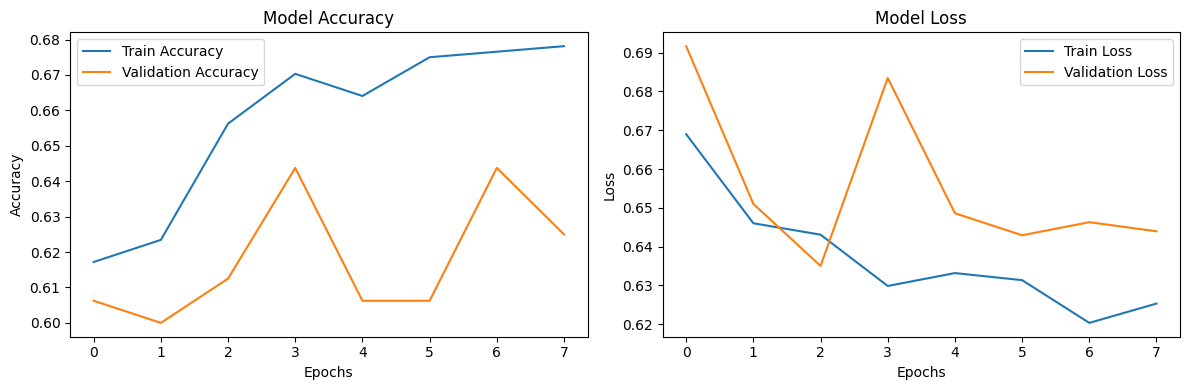

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
loss_train, accuracy_train = model.evaluate(X_train, y_train)

print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
print("=====================================")
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Loss: {loss_train}")




25/25 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6463
Test Accuracy: 0.6050000190734863
Test Loss: 0.6435065269470215
Train Accuracy: 0.6462500095367432
Train Loss: 0.6375262141227722


In [16]:
# print akurasi score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.605


7/7 [==============================] - 0s 2ms/step


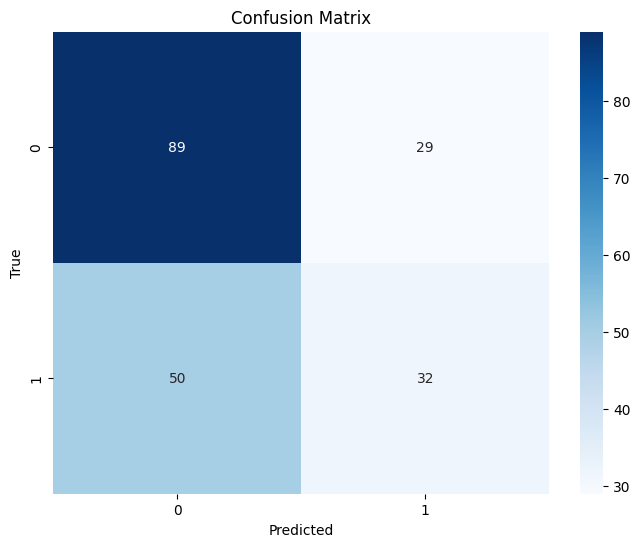

In [17]:
# Predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# Simpan model
model.save('model/model_ann.keras')

In [20]:
# Simpan arsitektur model ke file JSON
model_json = model.to_json()
with open("model/model_ann.json", "w") as json_file:
    json_file.write(model_json)

# Simpan bobot model ke file HDF5
model.save_weights("model/model_ann_weights.h5")
